In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# funcs

In [2]:
def metrics_from_txt(fname, round_num):
    paragraph = []
    with open(fname) as f:
        for sentence in f.readlines():
            # print(sentence)
            if sentence.startswith('Round'):
                # print(sentence[:-1])
                if sentence == 'Round 0:\n':
                    paragraph.append(sentence[:-2])
                else:
                    paragraph.append(sentence[:-2])
            elif sentence.startswith('testing '):
                # print(sentence[:-1])
                paragraph.append(sentence[:-1])
            elif sentence.startswith('!!!!!total used time:'):
                time = float(sentence.split(' ')[-1])
    # print(paragraph)
    data_dict = {}
    for n in range(len(paragraph)//3):
        roundnum = paragraph[3*n].split()[1]
        acc = paragraph[3*n+1].split()
        f1 = paragraph[3*n+2].split()
        if int(roundnum) not in data_dict:
            data_dict[int(roundnum)] = {acc[1]:[float(acc[2])], f1[1]:[float(f1[2])]}
        elif int(roundnum) in data_dict:
            data_dict[int(roundnum)][acc[1]].append(float(acc[2]))
            data_dict[int(roundnum)][f1[1]].append(float(f1[2]))
    # print(len(data_dict[5]['F1']))
    time = time/len(data_dict[5]['F1'])
    for n in range(round_num):
        data_dict[n]['accuracy'] = np.mean(data_dict[n]['accuracy'])
        data_dict[n]['F1'] = np.mean(data_dict[n]['F1'])
    df = pd.DataFrame.from_dict(data_dict).T
    # print(df)
    return df, time

# time analysis

In [3]:
round_num = 11
file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/batch32_epoch20_imbalance"
# file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_original/logfile"
file_list = [f for f in os.listdir(file_dir) if f.endswith('txt')]
file_list = [f for f in file_list if '10_0_100' in f]
cell_list = list(set([c.split('_')[1] for c in file_list]))
print(cell_list)
# query_list = list(set([q.split('_')[2] for q in file_list]))
query_list = ['BadgeSampling', 'MarginSampling', 'AdversarialBIM', 'KMeansSampling', 'RandomSampling', 'BALDDropout', 'LeastConfidence', 'KCenterGreedy']
name_list = ['BADGE', 'Margin', 'AdversarialBIM', 'K-Means', 'Random', 'BALDDropout', 'LeastConfidence', 'CoreSet']
idx = [4, 6, 1, 5, 3, 7, 0, 2]
query_list = [query_list[i] for i in idx]
name_list = [name_list[i] for i in idx]
num = {'MCF7': 810, 'PC3':957, 'A549':642}
print(query_list)
dict_time = {}
for cell in sorted(cell_list):
    dict_time[cell] = {}
    dict_time[cell]['num'] = num[cell]
    f_c = [f for f in file_list if cell in f]
    for query, name in zip(query_list,name_list):
        f_qc = [f for f in f_c if query in f]
        if len(f_qc)!=1:
            print('wrong')
            continue
        f_qc = f_qc[0]
        try:
            df, time = metrics_from_txt(f'{file_dir}/{f_qc}', round_num)
            # print(f_qc)
        except: 
            continue
        # print(query, name, time)
        dict_time[cell][name] = int(time)
df_time = pd.DataFrame.from_dict(dict_time)

['PC3', 'A549', 'MCF7']
['RandomSampling', 'LeastConfidence', 'MarginSampling', 'BALDDropout', 'KMeansSampling', 'KCenterGreedy', 'BadgeSampling', 'AdversarialBIM']


In [4]:
df_time.T

,num,Random,LeastConfidence,Margin,BALDDropout,K-Means,CoreSet,BADGE,AdversarialBIM
A549,642,434,472,477,582,626,514,1730,1471
MCF7,810,477,501,515,547,699,543,1894,1737
PC3,957,485,524,540,594,737,603,1958,1839


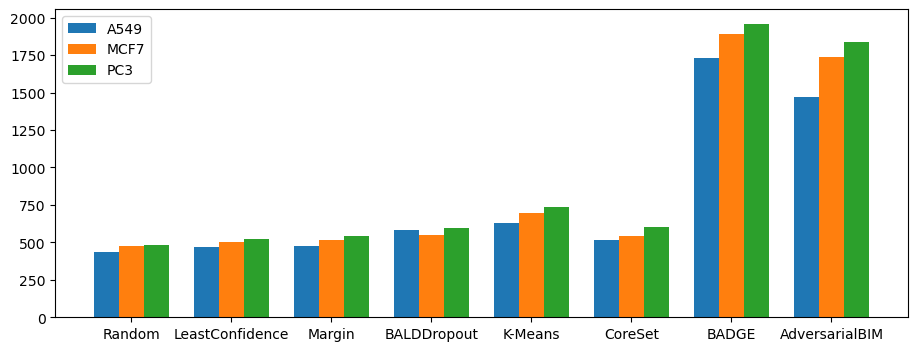

In [30]:
fig = plt.subplots(1,1, figsize=(11,4))
barWidth = 0.25

i = 0
x = np.arange(8)
x = [i - barWidth for i in x]
for c in df_time.columns.tolist():
    x = [i + barWidth for i in x]
    # x = df_time.T.columns.tolist()[1:]
    y = df_time[c].tolist()[1:]
    plt.bar(x, y, width = barWidth, label =c) 
    i += 1
    
# plt.xlabel('Branch', fontweight ='bold', fontsize = 15) 
# plt.ylabel('Students passed', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(8)], df_time.T.columns.tolist()[1:])

plt.legend()
plt.show()

Random
LeastConfidence
Margin
BALDDropout
K-Means
CoreSet
BADGE
AdversarialBIM


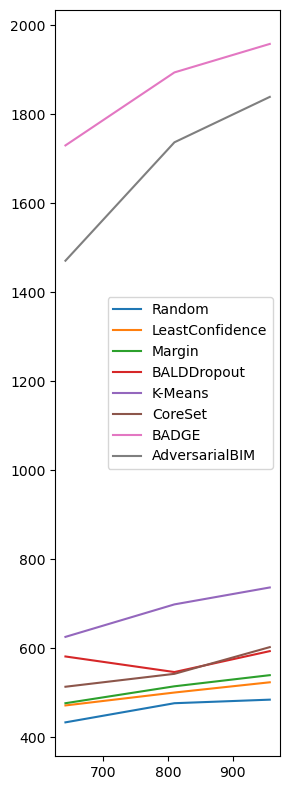

In [29]:
x = df_time.T.num.tolist()
fig, ax = plt.subplots(1,1, figsize=(3,8))
i = 0
for name in df_time.T.columns.tolist()[1:]:
    print(name)
    y = df_time.T[name].tolist()
    ax.plot(x, y, label=name)
    i += 1
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(f'/egr/research-aidd/menghan1/AnchorDrug/figs/converge_querys_{cell}.pdf')
plt.show()

# # fig, ax = plt.subplots(1,1, figsize=(6,3))
# i = 0
# for name in df_time.T.columns.tolist()[-2:]:
#     print(name)
#     y = df_time.T[name].tolist()
#     ax[1].plot(x, y, label=name)
#     i += 1
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# # plt.savefig(f'/egr/research-aidd/menghan1/AnchorDrug/figs/converge_querys_{cell}.pdf')
# plt.show()

# convergency

In [ ]:

round_num = 11
file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline/logfile/batch32_epoch20_imbalance"
# file_dir = "/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_original/logfile"
file_list = [f for f in os.listdir(file_dir) if f.endswith('txt')]
file_list = [f for f in file_list if '10_0_100' in f]
cell_list = list(set([c.split('_')[1] for c in file_list]))
print(cell_list)
# query_list = list(set([q.split('_')[2] for q in file_list]))
query_list = ['BadgeSampling', 'MarginSampling', 'AdversarialBIM', 'KMeansSampling', 'RandomSampling', 'BALDDropout', 'LeastConfidence', 'KCenterGreedy']
name_list = ['BADGE', 'Margin', 'AdversarialBIM', 'K-Means', 'Random', 'BALDDropout', 'LeastConfidence', 'CoreSet']
idx = [4, 6, 1, 5, 3, 7, 0, 2]
query_list = [query_list[i] for i in idx]
name_list = [name_list[i] for i in idx]
fig, ax = plt.subplots(1,3, figsize=(10,3))
i = 0
for cell in cell_list:
    f_c = [f for f in file_list if cell in f]
    # print(f_c)
    j = 0
    for query in query_list:
        f_qc = [f for f in f_c if query in f]
        if len(f_qc)!=1:
            print('wrong')
            continue
        f_qc = f_qc[0]
        try:
            df, time = metrics_from_txt(f'{file_dir}/{f_qc}', round_num)
            print(f_qc)
        except: 
            continue
        x = df.index.to_list()
        x = [e*10 for e in x]#[1:]
        acc = df.accuracy.to_list()#[1:]
        f1 = df.F1.to_list()#[1:]
        # ax[i].plot(x, f1, label=name_list[j])
        ax[i].plot(x, acc, label=name_list[j])
        j += 1
    ax[i].set_title(f'Cell line {cell}')
    i += 1
plt.legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(f'/egr/research-aidd/menghan1/AnchorDrug/figs/converge_querys_{cell}.pdf')
plt.show()